# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [13]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Dataset sintético para clasificar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
import pandas as pd
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [15]:
df = pd.read_csv('data/reviews_sentiment.csv', sep=";")
df.head(4)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [17]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [5]:
df.shape

(257, 7)

In [18]:
df.tail()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393
256,Sg S5,Excelente y exacta,3,negative,positive,5,3.264579


In [39]:
df2 = df[['wordcount', 'sentimentValue', 'Star Rating']]

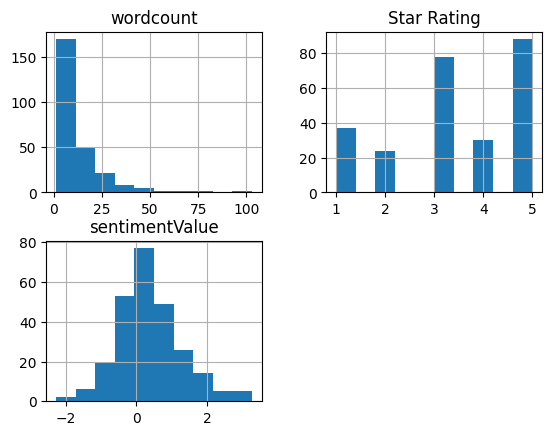

In [26]:
df.drop(columns=['Review Title']).hist()
plt.show()

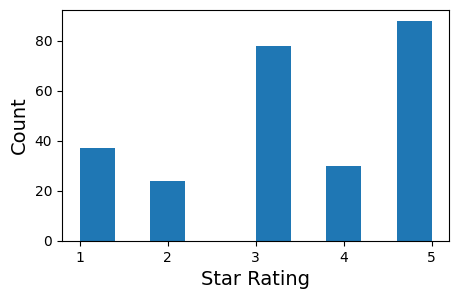

In [79]:
plt.figure(figsize=(5, 3)) 
plt.hist(df['Star Rating']) 
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(int(df['Star Rating'].min()), int(df['Star Rating'].max()) + 1))
plt.show()

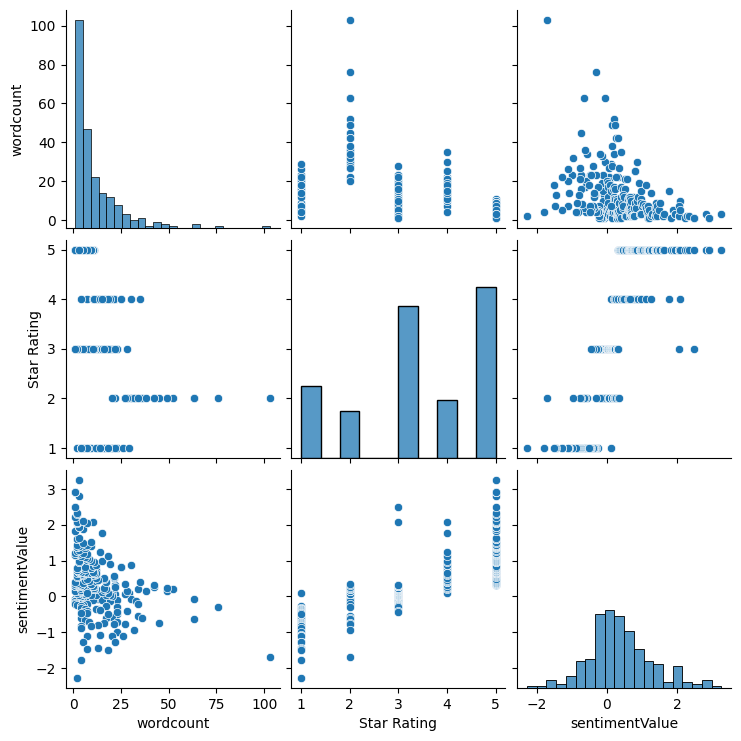

In [10]:
sns.pairplot(df)

<Figure size 1440x1440 with 0 Axes>

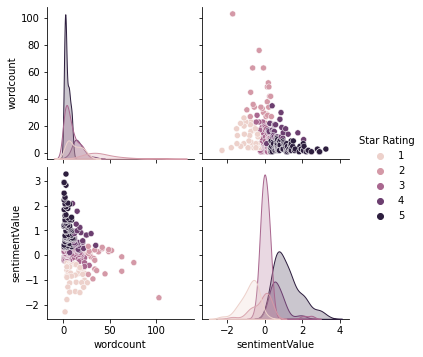

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df.head(3)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240


In [41]:
df2.head()

,wordcount,sentimentValue,Star Rating
0,23,-0.486389,1
1,20,-0.586187,1
2,4,-0.602240,1
3,17,-0.616271,1
4,6,-0.651784,1


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2.drop(columns='Star Rating',))

# Convertir el ndarray de vuelta a un DataFrame
df2 = pd.DataFrame(df_scaled, columns=df2.columns[:-1])

In [44]:
X = df2[['wordcount','sentimentValue']]
y = df['Star Rating'] 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73)

In [46]:
# Normalización de los Datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 2)
(52, 2)
(205,)
(52,)


In [23]:
from sklearn.preprocessing import MinMaxScaler

## Creamos el Modelo
Entrena con un KNN con el parametro n_neighbors = 5 y evalúa el error en train y en test

In [48]:
from sklearn.neighbors import KNeighborsClassifier
# Entrenar el Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
print("Accuracy train", knn.score(X_train, y_train))
print("Accuracy test", knn.score(X_test, y_test))

Accuracy train 0.88268156424581
Accuracy test 0.8846153846153846


## Resultados obtenidos

In [ ]:
# Escalando los datos obtenemos un mucho mejor performance (distancia entre sus vecinos en la misma escala!)

In [50]:
y_pred = knn.predict(X_test)

In [51]:
np.unique(y_pred)

array([1, 2, 3, 4, 5], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[12,  1,  2,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0, 15,  0,  1],
       [ 0,  0,  1,  9,  4],
       [ 0,  0,  0,  0, 26]], dtype=int64)

<Axes: >

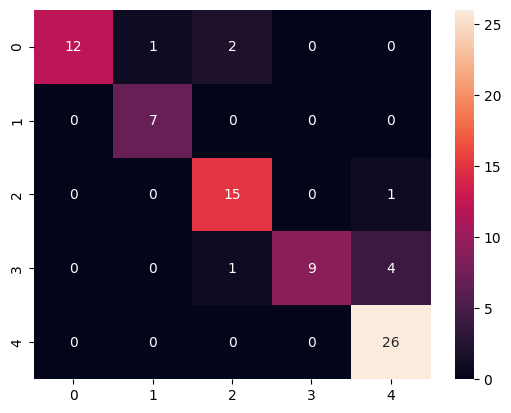

In [53]:
sns.heatmap(c_mat, annot=True)

## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [54]:
k_range = range(1,40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

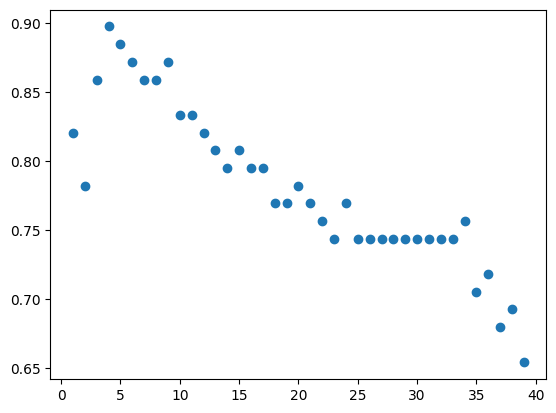

In [55]:
plt.scatter(k_range,scores);

In [49]:
np.array(k_range)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [40]:
np.array(k_range)[scores == max(scores)]

array([18])

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [56]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7692307692307693

In [57]:
from sklearn.model_selection import cross_val_score, KFold

In [58]:
knn = KNeighborsClassifier(n_neighbors=18)

In [59]:
kfold = KFold(10, shuffle=True)
results_cv = cross_val_score(knn, scaler.fit_transform(X), y, cv=kfold, scoring='accuracy')

In [60]:
results_cv

array([0.92307692, 0.84615385, 0.88461538, 0.96153846, 0.61538462,
       0.88461538, 0.84615385, 0.76      , 0.8       , 0.8       ])

In [61]:
results_cv.mean()

0.8321538461538461

In [62]:
results_cv.std()

0.09228576662678535